# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Samuel

Last Name: Kadin

Student ID: 913351901

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [1]:
#My API key
apikey = "My7lZFz5ijGTfLPcU8oN1S6tLb4psdijUYNyZyAE"

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [2]:
import requests
import requests_cache
import pandas as pd

pd.set_option('display.max_columns', None)
#import urlparse

def ndb_search(apikey, search):
    """ Function that takes in an API key and a search term to retrieve a json from USDA.gov website
        
        Inputs:
            apikey , search term (string)
            
        Outputs:
            JSON list of items from the given search term
    """
    parameters = {"api_key":apikey,
                  "q":search,
                  "format":"json"}
    
    url = "https://api.nal.usda.gov/ndb/search"
    reqdf = requests.get(url,params = parameters)
    
    #If/else statements to extract the correct portion of the JSON
    
    if 'error' in reqdf.json():
        reqdf = []
    elif 'list' in reqdf.json():
        reqdf = reqdf.json()['list']['item']
    else:
        reqdf = []
    return(reqdf)

#Test
    
#x = ndb_search(apikey, "apple")
#x

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

### Try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph
My strategy was to use the ndb_search function that I defined above to find the ndb number for each respective fruit and vegetable.  In order to make sure that the function pulled the correct ndb number, I added ", raw" to the fruit string in order to isolate raw foods, since all of our fruits and vegetables were raw.  Also they were unbranded so I focused on only the "SR" ds subset.  This was nearly correct, but still incorrectly pulled several nbd numbers, so I created a dictionary called "remap" and used the .get function to fix the last few incorrect nbd numbers 

In [3]:
#Reading in the fresh data that was provided to us

fresh = pd.read_csv("fresh.csv")
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.52,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.51,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.74,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.94,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.94,0.363763,0.707176,plums,fruit


In [4]:
#Created an empty DataFrame that we will use to store the ndb records
ndb = pd.DataFrame()

#Dictionary for exceptions in the upcoming for loop
remap = {"kiwi": "kiwifruit", "tangerines" : "tangerines mandarin"}

#For loop that gets the NDB numbers for each food item
for food in fresh["food"]:
    food1 = food.replace("_"," ")
    
    #Remap to fix a few of the exceptions
    
    food1 = remap.get(food1,food1)
    
    #dataframe of the ndb search results
    
    x = pd.DataFrame(ndb_search(apikey,food1 + ", raw"))
    
    try:
        x = x[x["ds"] == "SR"]
        ndb = ndb.append({"food":food,"ndb":x.iloc[0,3]}, ignore_index=True)
    except:
        ndb = ndb.append({"food":food,"ndb":"NaN"}, ignore_index=True)


In [5]:
#Create a copy of fresh to test the dataset on
fresh_test = fresh.copy()

#Create a copy of ndb to test the dataset on
ndb_test = ndb.copy()

#join fresh and ndb
fresh_ndb = fresh_test.join(ndb_test.set_index("food"), on ="food")

#Check to make sure the data merged correctly
fresh_ndb

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndb
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [6]:
def ndb_report(NDB):
    """Function that finds the nutrional information for a given NDB number
        
        Input:
            NDB number
            
        Output:
            Nutrional information (JSON)
    """
    parameters = {"api_key":apikey, "ndbno":NDB, "format":"json"}
    url = "https://api.nal.usda.gov/ndb/V2/reports"
    x = requests.get(url,params = parameters)
    #if 'error' in x.json():
        #x = []
    #elif 'list' in x.json():
        #x = x.json()
    #else:
        #x = []
    return(x)
    

In [7]:
#Dummy DataFrames that will be used in the upcoming for loop

k = pd.DataFrame()
k1= pd.DataFrame()

#For loop that creates a DataFrame with the given nutritional information

for index, row in fresh_ndb.iterrows():
    ndb_no = row["ndb"]
    k["food"] = [row["food"]]
    food = ndb_report(ndb_no)
    
    #Can use print to see which fruit has an error if one occurs
    #print(row["food"])
    
    for i in food.json()["foods"][0]["food"]["nutrients"]:
        k[i["name"]] = [i["value"]]
    k1 = k1.append(k)

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [8]:
k1.head()

,food,Water,Energy,Protein,Total lipid (fat),"Carbohydrate, by difference","Fiber, total dietary","Sugars, total","Calcium, Ca","Iron, Fe","Magnesium, Mg","Phosphorus, P","Potassium, K","Sodium, Na","Zinc, Zn","Vitamin C, total ascorbic acid",Thiamin,Riboflavin,Niacin,Vitamin B-6,"Folate, DFE",Vitamin B-12,"Vitamin A, RAE","Vitamin A, IU",Vitamin E (alpha-tocopherol),Vitamin D (D2 + D3),Vitamin D,Vitamin K (phylloquinone),"Fatty acids, total saturated","Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total trans",Cholesterol,Caffeine
0,watermelon,91.45,30,0.61,0.15,7.55,0.4,6.20,7,0.24,10,11,112,1,0.10,8.1,0.033,0.021,0.178,0.045,3,0.00,28,569,0.05,0.0,0,0.1,0.016,0.037,0.050,0.000,0,0
0,cantaloupe,90.15,34,0.84,0.19,8.16,0.9,7.86,9,0.21,12,15,267,16,0.18,36.7,0.041,0.019,0.734,0.072,21,0.00,169,3382,0.05,0.0,0,2.5,0.051,0.003,0.081,0.000,0,0
0,tangerines,85.17,53,0.81,0.31,13.34,1.8,10.58,37,0.15,12,20,166,2,0.07,26.7,0.058,0.036,0.376,0.078,16,0.00,34,681,0.20,0.0,0,0.0,0.039,0.060,0.065,0.000,0,0
0,strawberries,90.95,32,0.67,0.30,7.68,2.0,4.89,16,0.41,13,24,153,1,0.14,58.8,0.024,0.022,0.386,0.047,24,0.00,1,12,0.29,0.0,0,2.2,0.015,0.043,0.155,0.000,0,0
0,plums,87.23,46,0.70,0.28,11.42,1.4,9.92,6,0.17,7,16,157,0,0.10,9.5,0.028,0.026,0.417,0.029,5,0.00,17,345,0.26,0.0,0,6.4,0.017,0.134,0.044,0.000,0,0


In [9]:
#Recommended daily amount for earch micro/macro nutrient in our dataset (not including fatty acids or columns of all zeroes)
# source: https://www.dsld.nlm.nih.gov/dsld/dailyvalue.js
perc_recom = [50,65,300,30,50,1300,18,420,1250,4700,2300,11,90,1.2,1.3,16,1.7,400,900,15,120]

In [10]:
#Remove columns from k1 that are uneeded or redundent in the analysis for nutritional information
k_drop = k1.drop(["Vitamin A, IU","Vitamin D (D2 + D3)","Vitamin D","Vitamin B-12","Cholesterol","Caffeine","Fatty acids, total trans","Fatty acids, total saturated","Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated"],axis=1)
k_drop

#Convert the DataFrame to numeric 
k_drop = k_drop.apply(pd.to_numeric, errors = "ignore")

#k_drop2 = k_drop.drop(["Fatty acids, total sturated","Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated"])

#Drop the duplicates
k_drop = k_drop.drop_duplicates()

#Create an empty dataframe to be used in the for loop
k_score = pd.DataFrame()

#For loop that iterates each row of k_drop and converts to a singular nutritional "score"
for index, row in k_drop.iterrows():
    act = pd.DataFrame()
    t = row[3:] / perc_recom / row["Energy"] * 100
    act["food"] = [row["food"]]
    act["score"] = [sum(t)]
    k_score = k_score.append(act)
    
#Merge the dataframe with fresh

k_score_final = k_score.merge(fresh, on = "food")

In [11]:
k_score_final

,food,score,form,price_per_lb,yield,lb_per_cup,price_per_cup,type
0,watermelon,1.585726,Fresh1,0.333412,0.520000,0.330693,0.212033,fruit
1,cantaloupe,3.478368,Fresh1,0.535874,0.510000,0.374786,0.393800,fruit
2,tangerines,1.875736,Fresh1,1.377962,0.740000,0.407855,0.759471,fruit
3,strawberries,3.687004,Fresh1,2.358808,0.940000,0.319670,0.802171,fruit
4,plums,1.481584,Fresh1,1.827416,0.940000,0.363763,0.707176,fruit
5,oranges,2.737433,Fresh1,1.035173,0.730000,0.407855,0.578357,fruit
6,raspberries,2.263874,Fresh1,6.975811,0.960000,0.319670,2.322874,fruit
7,pomegranate,1.481404,Fresh1,2.173590,0.560000,0.341717,1.326342,fruit
8,pineapple,2.339712,Fresh1,0.627662,0.510000,0.363763,0.447686,fruit
9,apricots,1.921412,Fresh1,3.040072,0.930000,0.363763,1.189102,fruit


/Users/samuelkadin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


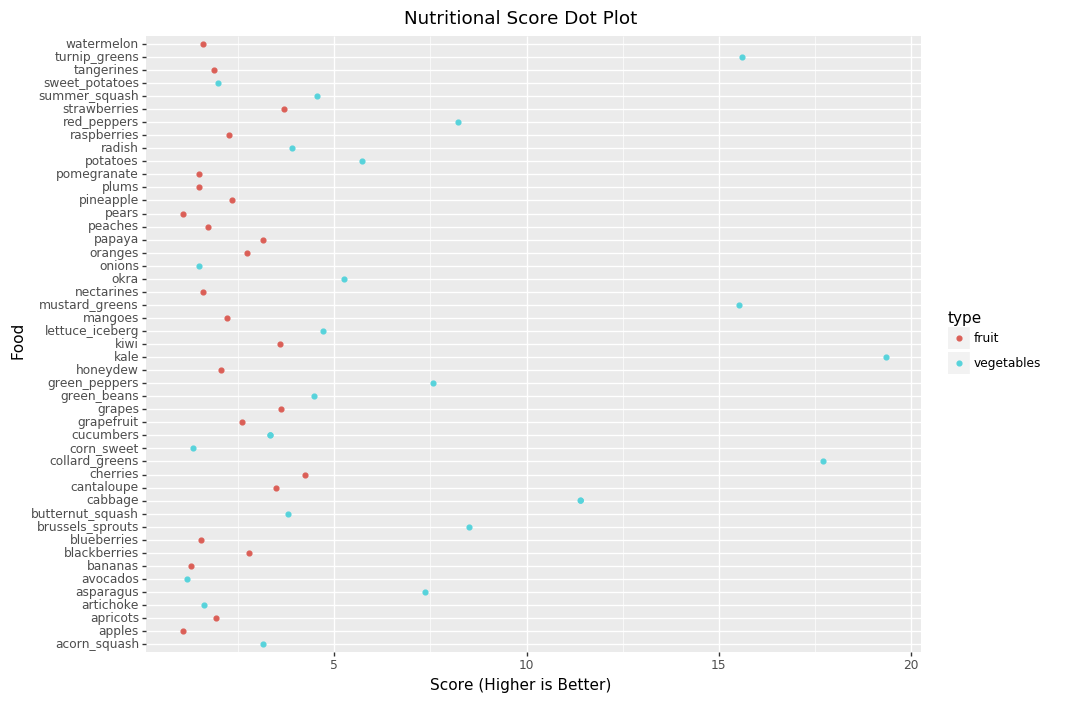

<ggplot: (-9223372036577669383)>

In [12]:
import matplotlib
import plotnine as gg


p = gg.ggplot(k_score_final, gg.aes(x = "score",y = "food", color = "type")) + gg.geom_point(position = gg.position_dodge(width = .1)) #+ gg.coord_flip()
p + gg.theme(figure_size = (10,8)) + gg.labs(title = 'Nutritional Score Dot Plot',x= "Score (Higher is Better)",y = "Food")


In [13]:
print("kale score is:",k_score_final.loc[43]["score"])

kale score is: 19.3463196701


In [14]:
#Create a copy for sklearn in the future
k_score_final_copy = k_score_final.copy()

#Creating a singular "value" for the pricing and yield for each food
k_score_final_copy["value"] = 1/(k_score_final_copy["price_per_cup"]/k_score_final_copy["lb_per_cup"])

In [15]:
from sklearn.preprocessing import StandardScaler

#Using Sklearn to standaridize score, value and yield
sc_X = StandardScaler()
ns = sc_X.fit_transform(k_score_final_copy[["score","value","yield"]])

In [16]:
#Created new columns for the standardized data above

k_score_final_copy["norm_score"] = ns[:,0]
k_score_final_copy["norm_price"] = ns[:,1]
k_score_final_copy["norm_yield"] = ns[:,2]

In [17]:
#check
k_score_final_copy.head()

,food,score,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,value,norm_score,norm_price,norm_yield
0,watermelon,1.585726,Fresh1,0.333412,0.52,0.330693,0.212033,fruit,1.559632,-0.687807,3.167767,-1.441425
1,cantaloupe,3.478368,Fresh1,0.535874,0.51,0.374786,0.393800,fruit,0.951717,-0.262331,1.261031,-1.496440
2,tangerines,1.875736,Fresh1,1.377962,0.74,0.407855,0.759471,fruit,0.537025,-0.622611,-0.039656,-0.231116
3,strawberries,3.687004,Fresh1,2.358808,0.94,0.319670,0.802171,fruit,0.398506,-0.215429,-0.474122,0.869166
4,plums,1.481584,Fresh1,1.827416,0.94,0.363763,0.707176,fruit,0.514388,-0.711219,-0.110659,0.869166


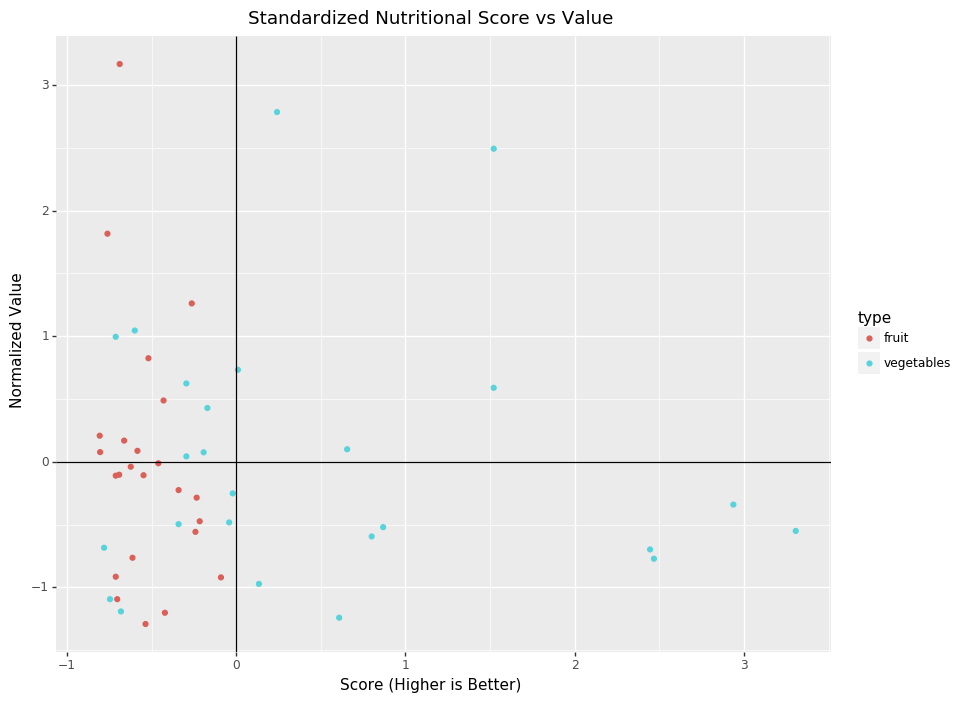

<ggplot: (7537414499)>

In [18]:
#Used Plotnine to create a scatter plot of Standardized score vs Standardized Value
p = gg.ggplot(k_score_final_copy, gg.aes(x = "norm_score",y = "norm_price", color = "type")) + gg.geom_point(position = gg.position_dodge(width = .1)) #+ gg.coord_flip()
p = p + gg.theme(figure_size = (10,8)) + gg.labs(title = 'Standardized Nutritional Score vs Value',x= "Score (Higher is Better)",y = "Normalized Value")
p + gg.geom_vline(xintercept = 0) + gg.geom_hline(yintercept = 0)


In [19]:
#Subsetting the data to find which foods had the best overall value and nutrition
k_score_final_copy[k_score_final_copy["norm_price"] > 2]

,food,score,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,value,norm_score,norm_price,norm_yield
0,watermelon,1.585726,Fresh1,0.333412,0.520000,0.330693,0.212033,fruit,1.559632,-0.687807,3.167767,-1.441425
31,potatoes,5.719478,Fresh1,0.564320,0.811301,0.264555,0.184017,vegetables,1.437662,0.241482,2.785207,0.161141
36,cabbage,11.411043,Fresh green cabbage1,0.579208,0.778797,0.330693,0.245944,vegetables,1.344589,1.520976,2.493281,-0.017677


In [20]:
#Subsetting the data to find which foods had the best value
k_score_final_copy[k_score_final_copy["norm_price"] > 3]

,food,score,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,value,norm_score,norm_price,norm_yield
0,watermelon,1.585726,Fresh1,0.333412,0.52,0.330693,0.212033,fruit,1.559632,-0.687807,3.167767,-1.441425


In [21]:
#Subsetting the data to find which foods had the best nutrition
k_score_final_copy[k_score_final_copy["norm_score"] > 3]

,food,score,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,value,norm_score,norm_price,norm_yield
43,kale,19.34632,Fresh1,2.807302,1.05,0.286601,0.766262,vegetables,0.374025,3.304867,-0.55091,1.47432


In [22]:
from sklearn.preprocessing import MinMaxScaler

#From the sklearn module, I used MinMaxScaler to 

minmax = MinMaxScaler(feature_range= (0,1))

ppp = minmax.fit_transform(k_score_final_copy[["score","value"]])
k_score_final_copy["minmax_score"] = ppp[:,0]
k_score_final_copy["minmax_value"] = ppp[:,1]


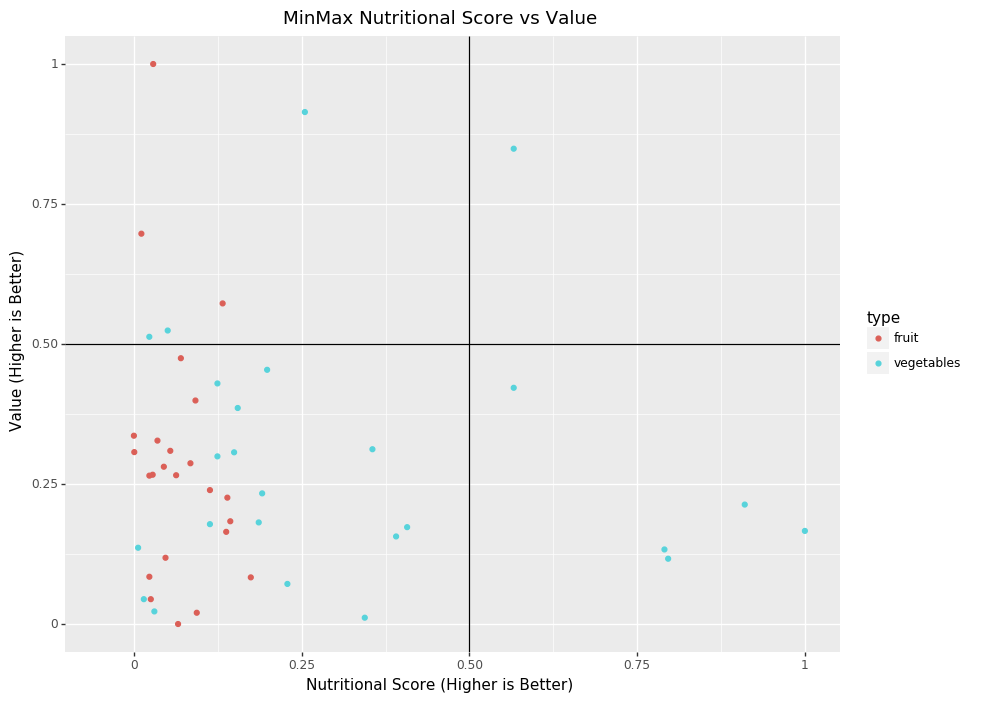

<ggplot: (7537464296)>

In [23]:
#Created a 4 quadrant scatter plot for minmax score and minmax value

p = gg.ggplot(k_score_final_copy, gg.aes(x = "minmax_score",y = "minmax_value", color = "type")) + gg.geom_point(position = gg.position_dodge(width = .1)) #+ gg.coord_flip()
p = p + gg.theme(figure_size = (10,8)) + gg.labs(title = 'MinMax Nutritional Score vs Value',x= "Nutritional Score (Higher is Better)",y = "Value (Higher is Better)")
p + gg.geom_vline(xintercept = 0.5) + gg.geom_hline(yintercept = 0.5)

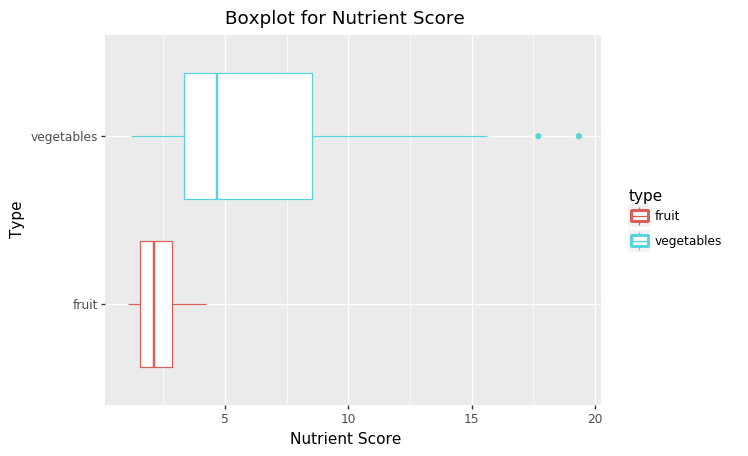

<ggplot: (7537464780)>

In [24]:
#Created a boxplot to compare the score distributions between fruits and vegetables

p = gg.ggplot(k_score_final_copy) + gg.aes(x = 'type', y = "score", color = "type")
p + gg.geom_boxplot() + gg.coord_flip() + gg.labs(y = "Nutrient Score", x = "Type", title = "Boxplot for Nutrient Score")

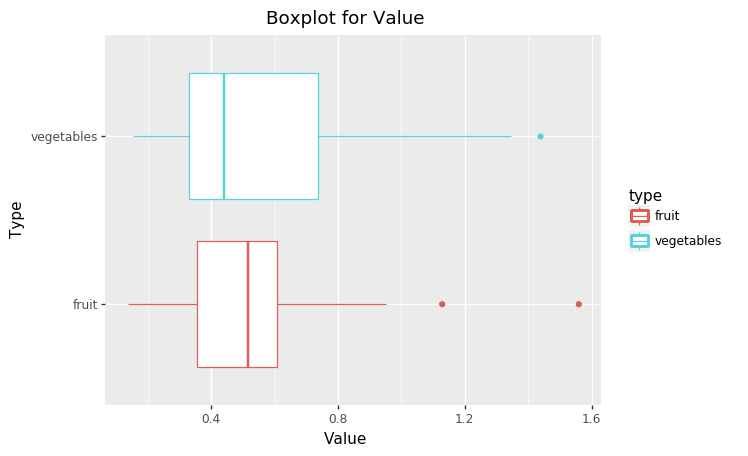

<ggplot: (7537964082)>

In [25]:
#Distributions for value in boxplot form

p = gg.ggplot(k_score_final_copy) + gg.aes(x = 'type', y = "value", color = "type")
p + gg.geom_boxplot() + gg.coord_flip() + gg.labs(y = "Value", x = "Type", title = "Boxplot for Value")

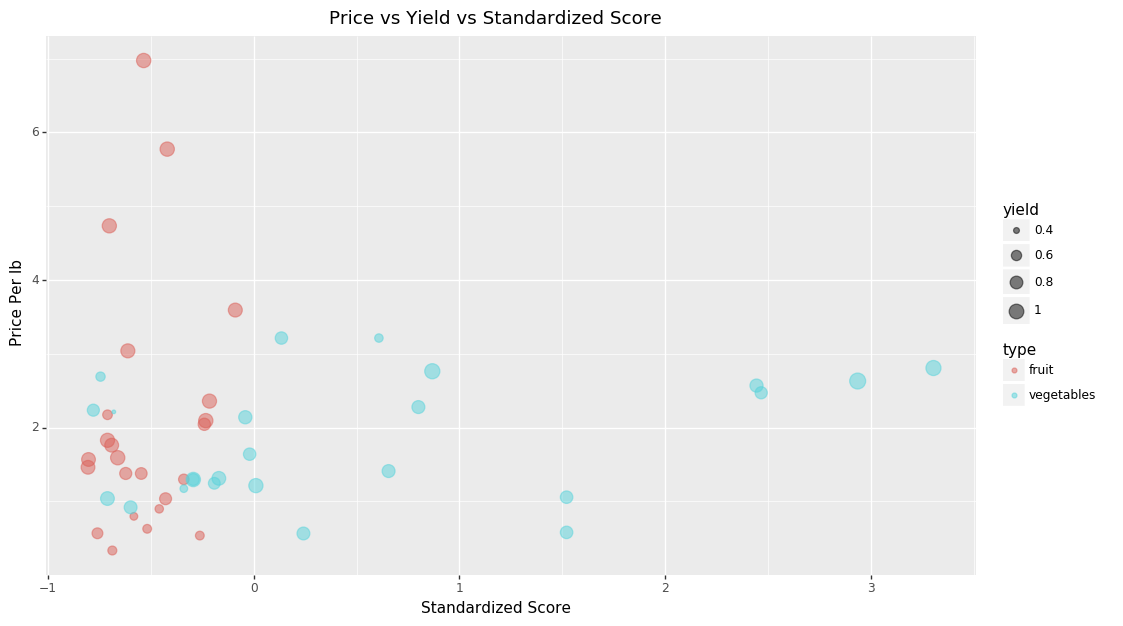

<ggplot: (-9223372029318022852)>

In [27]:
#Scatter plot comparing norm_score with price per pound and yield

p = gg.ggplot(k_score_final_copy) + gg.aes(x='norm_score', 
                                       y='price_per_lb', 
                                       color='type', 
                                       size = "yield") + gg.geom_point(alpha=.5) + gg.theme(figure_size = (12,7))
p + gg.labs(x = "Standardized Score",
            y = "Price Per lb",
            title = "Price vs Yield vs Standardized Score")

### Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

My strategy to analyze nutrition was to create a score weighted on calories, so that there was an objective singular value for each food to express "nutrional value". Since I'm not a nutritionist I chose to give each micro/macro nutrient the same weight, and then find a "score" using the 2,000 calorie per day daily values provided by the FDA. In order to create the score I summed up the value of the now weighted nutrients (while removing repetative nutrients such as fatty acids and vitamin A IU, which were already accounted for in other variables) and then weighted further on calories, so that we had each food with a score per calorie, since nutrition for most americans are on calorie restricted diets.

My findings were interesting.  In the "Nutritional Value Dot Plot" we see that Kale, unsurprisingly has the highest nutrional value per calorie at a score of 19.3463196701, and that vegetables appear to be more nutritious on average than fruits.  This can be more easily observed in the "Box Plot for Nutrient Score", where vegetables have a much larger variance, and median than fruits, which have a very compact distribution.  As concluded in HW3 and seen in the "Box Plot for Value", we see fairly similar distributions of value (price and yield) for both fruits and vegetables.  In the "Standardized Nutritional Score vs Value" 4-quadrant scatter plot, we see that Kale is over 3 standard deviations above the mean for Nutrional Score, and Watermelon is over 3 standard deviations above the mean for Value.  Similar observations can be made in the "MinMax Nutritional Score vs Value" graph.

Now to answer which food is the best combination of price, yield, and nutrition isn't the easiest.  While Kale is over 3 standard deviations above the mean for Score, it's slightly below the mean for Value, and while Watermelon is 3 standard deviations above the mean for Value, it's slightly below the mean for Score, essentially mirroring Kale.  Both of these are the extremes for value, and score, but looking for one that is strong in both is clear.  Green Cabbage, which is 2.49 standard deviations above the mean in Value, and 1.52 standard deviations above the score.  Thus we conclude that Green Cabbage is the food which is the best combination of price, yield and nutrition. 